### Creating Dataframes and Editing Dataframes

In this week we are creating a dataframe, adding and editing columns and column values.

In [3]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [16]:
#Add a Date column
df['Date'] = ['Dec 1', 'May', 'June 13, 2018']
#Add a Delivered column
df['Delivered'] = True
#Add a Feedback column
df['Feedback'] = ['Positive',  None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,Dec 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,May,True,None
Store 2,5.0,Spoon,Filip,"June 13, 2018",True,Negative


In [22]:
#reset index from the stores to a 0, 1, 2 so we can change our column values

newdf=df.reset_index()

#change values of the Date column
newdf['Date'] = pd.Series({0: 'December 1, 2017', 2:'June 13, 2018'})
newdf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,"December 1, 2017",True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,"June 13, 2018",True,Negative


In [30]:
#Creating a Student dataframe and Staff dataframe

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
#setting the index of both dataframes to the Name so we are able to merge them
staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')


print(staff_df, '\n ', '\n ','\n ',student_df)

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader 
  
  
              School
Name              
James     Business
Mike           Law
Sally  Engineering


### Merging Dataframes

In the pd.merge function, using the left_index and right_index = True means that the dataframe will use the indices as the key between the two tables. To use this the columns need to be the same number of levels.

In [31]:
#Outer join, left_index = True and right_index = True means
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [32]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [33]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [34]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


Now we will merge the dataframes based on specific columns instead of the index.

In [35]:
#We're resetting the index of both dataframes in order to merge them by the Name column

staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [36]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [38]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


### Using SQL like statements within Python
For those who are more comfortable using SQL, here we're using pandas but in a more 'sql - like' manner.

In [40]:
census = pd.read_csv('census.csv')
census

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


Q1: Select all rows where SUMLEV = 50 and reset the index to be State and City. Rename the ESTIMATESBASE2010 column to Estimates Base 2010.

In [42]:
#One line statement approach
(census.where(census['SUMLEV'] == 50).dropna().set_index(['STNAME', 'CTYNAME'])
 .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [44]:
#Multiple steps approach
census_r = census[census['SUMLEV']==50]
census_r.set_index(['STNAME', 'CTYNAME'], inplace=True)
census_r.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

Q2: Write a function to find the mix and max population estimate for years 2010 - 2015.

In [47]:
import numpy as np

def min_max(row):
    data = row[['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 
                'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})



census_r.apply(min_max, axis=1)

max       min
STNAME    CTYNAME                               
Alabama   Autauga County       55347.0   54660.0
          Baldwin County      203709.0  183193.0
          Barbour County       27341.0   26489.0
          Bibb County          22861.0   22512.0
          Blount County        57776.0   57373.0
          Bullock County       10887.0   10606.0
          Butler County        20944.0   20154.0
          Calhoun County      118437.0  115620.0
          Chambers County      34153.0   33993.0
          Cherokee County      26084.0   25859.0
          Chilton County       43943.0   43665.0
          Choctaw County       13841.0   13170.0
          Clarke County        25767.0   24675.0
          Clay County          13880.0   13456.0
          Cleburne County      15072.0   14921.0
          Coffee County        51211.0   50177.0
          Colbert County       54514.0   54354.0
          Conecuh County       13208.0   12662.0
          Coosa County         11758.0   10724.0
          Covington County     38060.0   37796.0
          Crenshaw County      13963.0   13853.0
          Cullman County       82005.0   80374.0
          Dale County          50358.0   49501.0
          Dallas County        43803.0   41131.0
          DeKalb County        71387.0   70869.0
          Elmore County        81468.0   79465.0
          Escambia County      38309.0   37784.0
          Etowah County       104442.0  103057.0
          Fayette County       17231.0   16759.0
          Franklin County      31734.0   31507.0
...                                ...       ...
Wisconsin Washburn County      15930.0   15552.0
          Washington County   133674.0  131967.0
          Waukesha County     396488.0  390076.0
          Waupaca County       52422.0   51945.0
          Waushara County      24581.0   24033.0
          Winnebago County    169639.0  167059.0
          Wood County          74807.0   73435.0
Wyoming   Albany County        37956.0   36428.0
          Big Horn County      12022.0   11672.0
          Campbell County      49220.0   46244.0
          Carbon County        15856.0   15559.0
          Converse County      14343.0   13728.0
          Crook County          7444.0    7114.0
          Fremont County       41129.0   40222.0
          Goshen County        13666.0   13383.0
          Hot Springs County    4846.0    4741.0
          Johnson County        8636.0    8552.0
          Laramie County       97121.0   92271.0
          Lincoln County       18722.0   17943.0
          Natrona County       82178.0   75472.0
          Niobrara County       2548.0    2475.0
          Park County          29237.0   28259.0
          Platte County         8812.0    8678.0
          Sheridan County      30020.0   29146.0
          Sublette County      10418.0    9899.0
          Sweetwater County    45162.0   43593.0
          Teton County         23125.0   21297.0
          Uinta County         21102.0   20822.0
          Washakie County       8545.0    8316.0
          Weston County         7234.0    7065.0

[3142 rows x 2 columns]

In [48]:
#Adding min and max as additional columns to the end of the census dataframe

def min_max1(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
census_r.apply(min_max1, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [49]:
#Lambda method

rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
census_r.apply(lambda x: np.max(x[rows]), axis=1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

### Group by in python

In [51]:
for group, frame in census_r.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in '+ group + ' have an avg pop of ' + str(avg))

Counties in Alabama have an avg pop of 71339.34328358209
Counties in Alaska have an avg pop of 24490.724137931036
Counties in Arizona have an avg pop of 426134.4666666667
Counties in Arkansas have an avg pop of 38878.90666666667
Counties in California have an avg pop of 642309.5862068966
Counties in Colorado have an avg pop of 78581.1875
Counties in Connecticut have an avg pop of 446762.125
Counties in Delaware have an avg pop of 299311.3333333333
Counties in District of Columbia have an avg pop of 601723.0
Counties in Florida have an avg pop of 280616.5671641791
Counties in Georgia have an avg pop of 60928.63522012578
Counties in Hawaii have an avg pop of 272060.2
Counties in Idaho have an avg pop of 35626.86363636364
Counties in Illinois have an avg pop of 125790.50980392157
Counties in Indiana have an avg pop of 70476.10869565218
Counties in Iowa have an avg pop of 30771.262626262625
Counties in Kansas have an avg pop of 27172.55238095238
Counties in Kentucky have an avg pop of 3616

In [55]:
cen_df = pd.read_csv('census.csv')
#create another census df where the SUMLEV is set to 50
cen_df = cen_df[cen_df['SUMLEV']==50]

In [63]:
#Group the df by statename and give the average of the census 2010 pop
cen_df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [64]:
#Multiple column calculcations
cen_df.groupby('STNAME').agg({'CENSUS2010POP': np.average, 'ESTIMATESBASE2010': np.max})

,CENSUS2010POP,ESTIMATESBASE2010
STNAME,,
Alabama,71339.343284,658350
Alaska,24490.724138,291826
Arizona,426134.466667,3817357
Arkansas,38878.906667,382789
California,642309.586207,9818700
Colorado,78581.187500,622261
Connecticut,446762.125000,916850
Delaware,299311.333333,538477
District of Columbia,601723.000000,601767


In [66]:
(cen_df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average, 'sum': np.sum}))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [68]:
(cen_df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


### Pivot tables in python

In [70]:
cars = pd.read_csv('cars.csv')
cars.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [72]:
cars.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.sum)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,70.0,1120.0
2014,NaN,104.0,107.0,NaN,49.0,80.0,70.0,805.0
2015,125.0,104.0,107.0,81.0,49.0,80.0,70.0,1924.0
2016,125.0,104.0,107.0,81.0,49.0,160.0,70.0,4097.0


In [73]:
cars.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Working with dates in pandas

In [74]:
pd.Timestamp('07/07/2010 10:00AM')

Timestamp('2010-07-07 10:00:00')

In [75]:
pd.Period('03/2019')

Period('2019-03', 'M')

In [76]:
#datetime index

t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [77]:
#Period Index
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [78]:
#Converting to datetime

d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,71,51
"Aug 29, 2014",52,42
2015-06-26,18,76
7/12/16,44,60


In [79]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,71,51
2014-08-29,52,42
2015-06-26,18,76
2016-07-12,44,60


In [80]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Working with dates in a dataframe

In [81]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [82]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,100,115
2016-10-16,106,117
2016-10-30,113,122
2016-11-13,111,119
2016-11-27,106,120
2016-12-11,114,121
2016-12-25,116,119
2017-01-08,111,127
2017-01-22,118,118


In [83]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [85]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,6.0,2.0
2016-10-30,7.0,5.0
2016-11-13,-2.0,-3.0
2016-11-27,-5.0,1.0
2016-12-11,8.0,1.0
2016-12-25,2.0,-2.0
2017-01-08,-5.0,8.0
2017-01-22,7.0,-9.0


In [86]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,106.333333,118.0
2016-11-30,108.500000,119.5
2016-12-31,115.000000,120.0
2017-01-31,114.500000,122.5


In [87]:
df['2017']

,Count 1,Count 2
2017-01-08,111,127
2017-01-22,118,118


In [88]:
df['2016-12']

,Count 1,Count 2
2016-12-11,114,121
2016-12-25,116,119


In [89]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,114,121
2016-12-25,116,119
2017-01-08,111,127
2017-01-22,118,118


In [90]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,100,115
2016-10-09,100,115
2016-10-16,106,117
2016-10-23,106,117
2016-10-30,113,122
2016-11-06,113,122
2016-11-13,111,119
2016-11-20,111,119
2016-11-27,106,120
2016-12-04,106,120


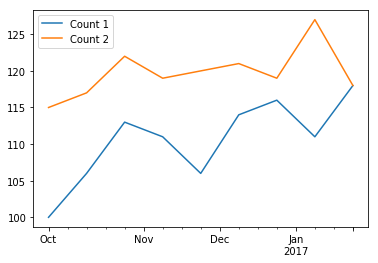

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()